In [2]:
!pip show pandas

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

pandas for analysis
- dataset
    - dictionary of items
    - list of dictionary
    - csv file
    - excel file
    - json file
    - sql connection
- creating dataframe
- reading data
- data selection
- manipulating data
- cleaning data
- visulaizing data

In [3]:
import pandas as pd

In [4]:
books = {
    'title': ['The art of war','The final empire','Ram'],
    'author': ['Sun Tzu','Brandson Sanderson','Amish Tripathi'],
    'price': [399, 1099, 499] 
}
pd.DataFrame(books)

,title,author,price
0,The art of war,Sun Tzu,399
1,The final empire,Brandson Sanderson,1099
2,Ram,Amish Tripathi,499


In [5]:
movies = [
    {'title':"PK",'director':"Rajkumar Hirani",'year':2014},
    {'title':"I",'director':"Shankar",'year':2015},
    {'title':"Pink",'director':"Aniruddha Roy Chawdhary",'year':2016},
]
pd.DataFrame(movies)

,title,director,year
0,PK,Rajkumar Hirani,2014
1,I,Shankar,2015
2,Pink,Aniruddha Roy Chawdhary,2016


In [6]:
pd.read_csv('dummy.csv')

,id,product,price
0,1,apple,100
1,2,banana,50
2,3,orange,80


In [7]:
pd.read_json('dummy.json')

,name,age,email
0,John Doe,25,johnny@gmail.com
1,Jane Doe,24,jane@gmail.com


In [8]:
pd.read_excel(r'C:\Users\Shagun\Desktop\dummy.xlsx')

,#,name,college
0,1,krish,amity
1,2,avichal,amity
2,3,shantanu,iti
3,4,himanshu,kuchbhiu


In [9]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/kc_house_data.csv'
df = pd.read_csv(url)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


first steps after reading the data
- `df.head(nrows)`- first n rows
- `df.tail(nrows)`- last n rows
- `df.info()` - data types and missing values
- `df.describe()`- summary statistics
- `df.shape` - number of rows and columns
- `df.columns`- column names

In [10]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [11]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [12]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11660,1775910270,20141020T000000,355000.0,3,1.00,1200,16000,1.0,0,0,...,7,1200,0,1970,0,98072,47.7452,-122.101,1960,15500
9732,263000324,20140513T000000,550000.0,7,4.00,3440,8100,2.0,0,0,...,7,3440,0,1970,0,98103,47.6981,-122.349,1420,1560
4025,7605800090,20150108T000000,1010000.0,3,2.50,2860,5805,2.0,0,0,...,9,2860,0,1999,0,98005,47.6218,-122.160,2360,5832
16344,7298040500,20140709T000000,486000.0,4,2.50,3560,12047,2.0,0,0,...,10,3560,0,1988,0,98023,47.3019,-122.341,3420,11250
3596,6979920090,20140626T000000,550000.0,4,2.50,2150,27540,2.0,0,0,...,8,2150,0,1997,0,98053,47.6370,-121.969,2150,27540
10082,3447000060,20141008T000000,577500.0,3,1.75,2140,13286,1.0,0,0,...,8,1220,920,1964,0,98006,47.5722,-122.128,2250,13286
11229,1005000240,20141219T000000,395000.0,2,1.00,1200,6014,1.0,0,0,...,6,600,600,1949,0,98118,47.5357,-122.280,1270,4652
6468,5694000768,20140922T000000,550000.0,3,2.25,1700,1481,3.0,0,0,...,8,1700,0,2002,0,98103,47.6598,-122.349,1560,1350
15908,6671900095,20140527T000000,313000.0,3,1.75,1320,6205,1.0,0,0,...,7,1320,0,1948,0,98133,47.7412,-122.343,1210,6205
9724,3904940160,20140904T000000,555000.0,3,2.50,2160,7584,2.0,0,0,...,8,2160,0,1988,0,98029,47.5751,-122.014,2160,7372


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
df.describe() # summary statistics for numerical columns (default)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
df.describe(include='object') # summary statistics for object columns

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [16]:
df.shape

(21613, 21)

In [17]:
print(df.columns.tolist())

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [18]:
# simple sort
df.sort_values('price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


In [19]:
# style the dataframe to highlight
# df.style.highlight_max(color='lightgreen')

# selecting data in pandas
- dataframe
    - rows
        -iloc - index based location
        - loc - label based location
    - columns
        - single column selection
        - multiple column selection
        - column selection by data type
    - conditional selection
        - boolean indexing
        - query method

In [20]:
# select rows form iloc
df.iloc[100] # 100 index row

id                    1952200240
date             20140611T000000
price                   850830.0
bedrooms                       3
bathrooms                    2.5
sqft_living                 2070
sqft_lot                   13241
floors                       1.5
waterfront                     0
view                           0
condition                      5
grade                          9
sqft_above                  1270
sqft_basement                800
yr_built                    1910
yr_renovated                   0
zipcode                    98102
lat                      47.6415
long                    -122.315
sqft_living15               2200
sqft_lot15                  4500
Name: 100, dtype: object

In [21]:
# random 5 rows
df.iloc[[1,59,100,200,300]] # idx [1,59,100,200,300] rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
59,8079040320,20150223T000000,430000.0,4,3.00,1850,9976,2.0,0,0,...,8,1850,0,1991,0,98059,47.5059,-122.149,2270,8542
100,1952200240,20140611T000000,850830.0,3,2.50,2070,13241,1.5,0,0,...,9,1270,800,1910,0,98102,47.6415,-122.315,2200,4500
200,3542300060,20150311T000000,210000.0,3,1.00,860,11725,1.0,0,0,...,6,860,0,1943,0,98056,47.5093,-122.184,1300,9514
300,3225069065,20140624T000000,3075000.0,4,5.00,4550,18641,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508


In [22]:
# random 5 rows, with selected columns
df.iloc[[1,10,20],[0,11,12,3,4]]

,id,grade,sqft_above,bedrooms,bathrooms
1,6414100192,7,2170,3,2.25
10,1736800520,8,1860,3,2.50
20,6300500875,7,860,4,1.75


In [23]:
df.iloc[15:50, :10] # idx 15-49 rows, 0-9 columns

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
15,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3
16,1875500060,20140731T000000,395000.0,3,2.00,1890,14040,2.0,0,0
17,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0
18,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0
19,7983200060,20150424T000000,230000.0,3,1.00,1250,9774,1.0,0,0
20,6300500875,20140514T000000,385000.0,4,1.75,1620,4980,1.0,0,0
21,2524049179,20140826T000000,2000000.0,3,2.75,3050,44867,1.0,0,4
22,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,2.0,0,0
23,8091400200,20140516T000000,252700.0,2,1.50,1070,9643,1.0,0,0
24,3814700200,20141120T000000,329000.0,3,2.25,2450,6500,2.0,0,0


In [24]:
# selecting columns based on indexes
df.iloc[:,[0,5,10,11]]

,id,sqft_living,condition,grade
0,7129300520,1180,3,7
1,6414100192,2570,3,7
2,5631500400,770,3,6
3,2487200875,1960,5,7
4,1954400510,1680,3,8
...,...,...,...,...
21608,263000018,1530,3,8
21609,6600060120,2310,3,8
21610,1523300141,1020,3,7
21611,291310100,1600,3,8


In [25]:
# updating index column
df = df.set_index('id')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
df.sample()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1432701230,20140729T000000,309000.0,3,1.0,1280,9656,1.0,0,0,4,6,920,360,1959,0,98058,47.4485,-122.175,1340,8808


In [27]:
df.loc[[1954400510, 9465910310]]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
9465910310,20140919T000000,550000.0,4,2.5,2810,7549,2.0,0,0,3,9,2810,0,1992,0,98072,47.7441,-122.173,2750,7642


### single column selection
- dictionary like selection
    - `dataframe['column name']`
- object-like selection
    - `dataframe.column_name`

### multiple column selection
- dictionary like selection
    - `dataframe['list_of_column_names']`

In [28]:
df['price']

id
7129300520    221900.0
6414100192    538000.0
5631500400    180000.0
2487200875    604000.0
1954400510    510000.0
                ...   
263000018     360000.0
6600060120    400000.0
1523300141    402101.0
291310100     400000.0
1523300157    325000.0
Name: price, Length: 21613, dtype: float64

In [29]:
df.bedrooms

id
7129300520    3
6414100192    3
5631500400    2
2487200875    4
1954400510    3
             ..
263000018     3
6600060120    4
1523300141    2
291310100     3
1523300157    2
Name: bedrooms, Length: 21613, dtype: int64

In [30]:
df[['bedrooms','price','sqft_living']]

,bedrooms,price,sqft_living
id,,,
7129300520,3,221900.0,1180
6414100192,3,538000.0,2570
5631500400,2,180000.0,770
2487200875,4,604000.0,1960
1954400510,3,510000.0,1680
...,...,...,...
263000018,3,360000.0,1530
6600060120,4,400000.0,2310
1523300141,2,402101.0,1020


In [31]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [32]:
col_list = ['grade','condition','yr_built']
df[col_list]

,grade,condition,yr_built
id,,,
7129300520,7,3,1955
6414100192,7,3,1951
5631500400,6,3,1933
2487200875,7,5,1965
1954400510,8,3,1987
...,...,...,...
263000018,8,3,2009
6600060120,8,3,2014
1523300141,7,3,2009


In [33]:
# df.columns.to_list().index('grade')
# df.iloc[:10:10+5]

# boolean indexing
`df[df['column'] > value]`

`df[df['column'] == value]`

`df[df['column'] != value]`

In [34]:
df[df['price'] > 1000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2524049179,20140826T000000,2000000.0,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
822039084,20150311T000000,1350000.0,3,2.50,2753,65005,1.0,1,2,5,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
1802000060,20140612T000000,1325000.0,5,2.25,3200,20158,1.0,0,0,3,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
1525059190,20140912T000000,1040000.0,5,3.25,4770,50094,1.0,0,0,4,11,3070,1700,1973,0,98005,47.6525,-122.160,3530,38917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7430200100,20140514T000000,1222500.0,4,3.50,4910,9444,1.5,0,0,3,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063
8672200110,20150317T000000,1088000.0,5,3.75,4170,8142,2.0,0,2,3,10,4170,0,2006,0,98056,47.5354,-122.181,3030,7980
191100405,20150421T000000,1575000.0,4,3.25,3410,10125,2.0,0,0,3,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125


In [35]:
df[df['condition'] <= 1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
9435300030,20140528T000000,550000.0,4,1.00,1660,34848,1.0,0,0,1,5,930,730,1933,0,98052,47.6621,-122.132,2160,11467
1726059053,20140916T000000,270000.0,2,1.50,1380,209959,1.0,0,0,1,6,1380,0,1954,0,98011,47.7461,-122.195,3130,19868
5175800060,20140623T000000,365000.0,4,2.00,1940,25600,1.0,0,0,1,8,1940,0,1962,0,98006,47.5722,-122.129,2000,10071
5694000710,20141107T000000,352950.0,3,1.00,1760,3000,1.5,0,0,1,6,1760,0,1900,0,98103,47.6598,-122.348,1320,1266
913000340,20150102T000000,252000.0,1,1.00,680,1638,1.0,0,4,1,6,680,0,1910,1992,98116,47.5832,-122.399,1010,3621
3886902445,20150316T000000,535000.0,2,1.00,920,9000,1.0,0,0,1,6,920,0,1954,0,98033,47.6831,-122.189,1760,8400
9187200245,20141231T000000,441000.0,4,1.50,1100,3300,1.0,0,0,1,7,1100,0,1919,0,98122,47.6033,-122.295,2020,4000
723049596,20140509T000000,255000.0,2,1.00,810,7980,1.0,0,0,1,6,810,0,1928,0,98146,47.4890,-122.337,1440,7980
6324000090,20150511T000000,210000.0,2,1.00,990,8140,1.0,0,0,1,6,990,0,1910,0,98116,47.5828,-122.382,2150,5000


In [36]:
# 5 star rated houses + 2 floors
df[(df['condition']== 5) & (df['floors']== 2)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
5072410070,20141021T000000,505000.0,3,1.75,2519,8690,2.0,0,0,5,8,2519,0,1973,0,98166,47.4428,-122.344,2500,9500
2331300505,20140613T000000,822500.0,5,3.50,2320,4960,2.0,0,0,5,7,1720,600,1926,0,98103,47.6763,-122.352,1700,4960
3127200041,20140613T000000,589000.0,4,3.00,2440,9600,2.0,0,0,5,7,2440,0,1961,0,98034,47.7044,-122.200,2290,9600
7424700045,20150513T000000,2050000.0,5,3.00,3830,8480,2.0,0,1,5,9,2630,1200,1905,1994,98122,47.6166,-122.287,3050,7556
9297300045,20140709T000000,550000.0,3,2.00,1970,4166,2.0,0,3,5,8,1270,700,1929,0,98126,47.5717,-122.375,2390,4166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528900330,20140707T000000,1450000.0,4,3.25,3770,4103,2.0,0,0,5,9,2710,1060,1925,0,98109,47.6410,-122.349,2560,4160
6822100155,20140512T000000,630000.0,4,2.00,1770,6000,2.0,0,0,5,7,1770,0,1911,1981,98199,47.6493,-122.401,1340,6000
3529300330,20141107T000000,370000.0,3,2.50,1980,6922,2.0,0,0,5,8,1980,0,1991,0,98031,47.3960,-122.184,2090,7697


In [37]:
f1 = df['price'] > 100000
f2 = df['condition'] == 5
f3 = df['floors'] == 2
df[f1 & f2 & f3]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
5072410070,20141021T000000,505000.0,3,1.75,2519,8690,2.0,0,0,5,8,2519,0,1973,0,98166,47.4428,-122.344,2500,9500
2331300505,20140613T000000,822500.0,5,3.50,2320,4960,2.0,0,0,5,7,1720,600,1926,0,98103,47.6763,-122.352,1700,4960
3127200041,20140613T000000,589000.0,4,3.00,2440,9600,2.0,0,0,5,7,2440,0,1961,0,98034,47.7044,-122.200,2290,9600
7424700045,20150513T000000,2050000.0,5,3.00,3830,8480,2.0,0,1,5,9,2630,1200,1905,1994,98122,47.6166,-122.287,3050,7556
9297300045,20140709T000000,550000.0,3,2.00,1970,4166,2.0,0,3,5,8,1270,700,1929,0,98126,47.5717,-122.375,2390,4166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528900330,20140707T000000,1450000.0,4,3.25,3770,4103,2.0,0,0,5,9,2710,1060,1925,0,98109,47.6410,-122.349,2560,4160
6822100155,20140512T000000,630000.0,4,2.00,1770,6000,2.0,0,0,5,7,1770,0,1911,1981,98199,47.6493,-122.401,1340,6000
3529300330,20141107T000000,370000.0,3,2.50,1980,6922,2.0,0,0,5,8,1980,0,1991,0,98031,47.3960,-122.184,2090,7697


In [38]:
df[f1 & f2 & f3].reset_index().style.highlight_max(color='blue')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5072410070,20141021T000000,505000.000000,3,1.750000,2519,8690,2.000000,0,0,5,8,2519,0,1973,0,98166,47.442800,-122.344000,2500,9500
1,2331300505,20140613T000000,822500.000000,5,3.500000,2320,4960,2.000000,0,0,5,7,1720,600,1926,0,98103,47.676300,-122.352000,1700,4960
2,3127200041,20140613T000000,589000.000000,4,3.000000,2440,9600,2.000000,0,0,5,7,2440,0,1961,0,98034,47.704400,-122.200000,2290,9600
3,7424700045,20150513T000000,2050000.000000,5,3.000000,3830,8480,2.000000,0,1,5,9,2630,1200,1905,1994,98122,47.616600,-122.287000,3050,7556
4,9297300045,20140709T000000,550000.000000,3,2.000000,1970,4166,2.000000,0,3,5,8,1270,700,1929,0,98126,47.571700,-122.375000,2390,4166
5,3204800200,20150108T000000,665000.000000,4,2.750000,3320,10574,2.000000,0,0,5,8,2220,1100,1960,0,98056,47.537600,-122.180000,2720,8330
6,1860600135,20140502T000000,2384000.000000,5,2.500000,3650,9050,2.000000,0,4,5,10,3370,280,1921,0,98119,47.634500,-122.367000,2880,5400
7,191100045,20140703T000000,940000.000000,4,2.000000,2490,9525,2.000000,0,0,5,9,2490,0,1968,0,98040,47.563900,-122.217000,2770,9525
8,1373800295,20141013T000000,1450000.000000,3,3.000000,4380,6320,2.000000,0,3,5,10,3580,800,1952,0,98199,47.645200,-122.411000,3080,7680
9,5379805460,20150121T000000,245000.000000,3,1.500000,1360,8910,2.000000,0,0,5,7,1360,0,1949,0,98188,47.448800,-122.275000,1220,8912


In [39]:
df[f1 & f2 & f3].reset_index().style.background_gradient(cmap='GnBu')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5072410070,20141021T000000,505000.000000,3,1.750000,2519,8690,2.000000,0,0,5,8,2519,0,1973,0,98166,47.442800,-122.344000,2500,9500
1,2331300505,20140613T000000,822500.000000,5,3.500000,2320,4960,2.000000,0,0,5,7,1720,600,1926,0,98103,47.676300,-122.352000,1700,4960
2,3127200041,20140613T000000,589000.000000,4,3.000000,2440,9600,2.000000,0,0,5,7,2440,0,1961,0,98034,47.704400,-122.200000,2290,9600
3,7424700045,20150513T000000,2050000.000000,5,3.000000,3830,8480,2.000000,0,1,5,9,2630,1200,1905,1994,98122,47.616600,-122.287000,3050,7556
4,9297300045,20140709T000000,550000.000000,3,2.000000,1970,4166,2.000000,0,3,5,8,1270,700,1929,0,98126,47.571700,-122.375000,2390,4166
5,3204800200,20150108T000000,665000.000000,4,2.750000,3320,10574,2.000000,0,0,5,8,2220,1100,1960,0,98056,47.537600,-122.180000,2720,8330
6,1860600135,20140502T000000,2384000.000000,5,2.500000,3650,9050,2.000000,0,4,5,10,3370,280,1921,0,98119,47.634500,-122.367000,2880,5400
7,191100045,20140703T000000,940000.000000,4,2.000000,2490,9525,2.000000,0,0,5,9,2490,0,1968,0,98040,47.563900,-122.217000,2770,9525
8,1373800295,20141013T000000,1450000.000000,3,3.000000,4380,6320,2.000000,0,3,5,10,3580,800,1952,0,98199,47.645200,-122.411000,3080,7680
9,5379805460,20150121T000000,245000.000000,3,1.500000,1360,8910,2.000000,0,0,5,7,1360,0,1949,0,98188,47.448800,-122.275000,1220,8912


In [40]:
df[f1 & f2 & f3].reset_index().style.set_properties(color='red', subset=['price'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5072410070,20141021T000000,505000.000000,3,1.750000,2519,8690,2.000000,0,0,5,8,2519,0,1973,0,98166,47.442800,-122.344000,2500,9500
1,2331300505,20140613T000000,822500.000000,5,3.500000,2320,4960,2.000000,0,0,5,7,1720,600,1926,0,98103,47.676300,-122.352000,1700,4960
2,3127200041,20140613T000000,589000.000000,4,3.000000,2440,9600,2.000000,0,0,5,7,2440,0,1961,0,98034,47.704400,-122.200000,2290,9600
3,7424700045,20150513T000000,2050000.000000,5,3.000000,3830,8480,2.000000,0,1,5,9,2630,1200,1905,1994,98122,47.616600,-122.287000,3050,7556
4,9297300045,20140709T000000,550000.000000,3,2.000000,1970,4166,2.000000,0,3,5,8,1270,700,1929,0,98126,47.571700,-122.375000,2390,4166
5,3204800200,20150108T000000,665000.000000,4,2.750000,3320,10574,2.000000,0,0,5,8,2220,1100,1960,0,98056,47.537600,-122.180000,2720,8330
6,1860600135,20140502T000000,2384000.000000,5,2.500000,3650,9050,2.000000,0,4,5,10,3370,280,1921,0,98119,47.634500,-122.367000,2880,5400
7,191100045,20140703T000000,940000.000000,4,2.000000,2490,9525,2.000000,0,0,5,9,2490,0,1968,0,98040,47.563900,-122.217000,2770,9525
8,1373800295,20141013T000000,1450000.000000,3,3.000000,4380,6320,2.000000,0,3,5,10,3580,800,1952,0,98199,47.645200,-122.411000,3080,7680
9,5379805460,20150121T000000,245000.000000,3,1.500000,1360,8910,2.000000,0,0,5,7,1360,0,1949,0,98188,47.448800,-122.275000,1220,8912


In [41]:
# query
df.query('price > 2500000')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7960900060,20150504T000000,2900000.0,4,3.25,5050,20100,1.5,0,2,3,11,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060
3225069065,20140624T000000,3075000.0,4,5.00,4550,18641,1.0,1,4,3,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
3760500116,20141120T000000,3070000.0,3,2.50,3930,55867,1.0,1,4,4,8,2330,1600,1957,0,98034,47.7022,-122.224,2730,26324
1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808100150,20150402T000000,3345000.0,5,3.75,5350,15360,1.0,0,1,3,11,3040,2310,2008,0,98004,47.6480,-122.218,3740,15940
1370800515,20141030T000000,2950000.0,4,4.25,4470,5884,2.0,0,1,3,11,3230,1240,2010,0,98199,47.6387,-122.405,2570,6000
6447300365,20141113T000000,2900000.0,5,4.00,5190,14600,2.0,0,1,3,11,5190,0,2013,0,98039,47.6102,-122.225,3840,19250


In [42]:
df.query('price > 2500000 & condition == 5')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
9471200370,20150330T000000,2537000.0,4,3.00,3710,20000,2.0,0,2,5,10,2760,950,1936,0,98105,47.6696,-122.261,3970,20000
6065300840,20150501T000000,2850000.0,4,4.00,5040,17208,1.0,0,0,5,10,2870,2170,1976,0,98006,47.5701,-122.188,4050,18647
4217402115,20150421T000000,3650000.0,6,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,47.6515,-122.277,3510,15810
7159200005,20140507T000000,3200000.0,7,4.50,6210,8856,2.5,0,2,5,11,4760,1450,1910,0,98109,47.6307,-122.354,2940,5400
9185700485,20150401T000000,2538000.0,4,3.50,4350,6000,2.0,0,0,5,10,2970,1380,1908,0,98112,47.6277,-122.286,4190,7200
3761100045,20140618T000000,3000000.0,4,4.25,4850,12445,2.0,1,4,5,10,3850,1000,1989,0,98034,47.7011,-122.244,3350,12210
1069000070,20150415T000000,2795000.0,5,3.25,4590,12793,2.0,0,2,5,11,3590,1000,1928,0,98199,47.6453,-122.410,2920,8609
1954700410,20140801T000000,2546000.0,4,3.00,4190,8805,2.5,0,2,5,9,3490,700,1928,0,98112,47.6181,-122.284,3780,8558
1732800780,20150212T000000,3065000.0,5,3.00,4150,7500,2.5,0,4,5,11,3510,640,1909,0,98119,47.6303,-122.362,2250,4050


In [43]:
df.query('price > 2500000 & condition == 5').sort_values('price')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
9471200370,20150330T000000,2537000.0,4,3.00,3710,20000,2.0,0,2,5,10,2760,950,1936,0,98105,47.6696,-122.261,3970,20000
9185700485,20150401T000000,2538000.0,4,3.50,4350,6000,2.0,0,0,5,10,2970,1380,1908,0,98112,47.6277,-122.286,4190,7200
1954700410,20140801T000000,2546000.0,4,3.00,4190,8805,2.5,0,2,5,9,3490,700,1928,0,98112,47.6181,-122.284,3780,8558
1069000070,20150415T000000,2795000.0,5,3.25,4590,12793,2.0,0,2,5,11,3590,1000,1928,0,98199,47.6453,-122.410,2920,8609
6065300840,20150501T000000,2850000.0,4,4.00,5040,17208,1.0,0,0,5,10,2870,2170,1976,0,98006,47.5701,-122.188,4050,18647
5317100750,20140711T000000,2920000.0,4,4.75,4575,24085,2.5,0,2,5,10,3905,670,1926,0,98112,47.6263,-122.284,3900,9687
6613000930,20140902T000000,2950000.0,4,3.25,3890,25470,2.0,1,3,5,10,3030,860,1923,0,98105,47.6608,-122.269,4140,19281
3761100045,20140618T000000,3000000.0,4,4.25,4850,12445,2.0,1,4,5,10,3850,1000,1989,0,98034,47.7011,-122.244,3350,12210
1732800780,20150212T000000,3065000.0,5,3.00,4150,7500,2.5,0,4,5,11,3510,640,1909,0,98119,47.6303,-122.362,2250,4050


### Manipulation and cleaning data
- removing columns
- renaming columns
- adding columns
- changing data types
- handling missing values
- dropping missing values
- using `apply()` method


In [44]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [45]:
cols_to_drop = ['sqft_living15','sqft_lot15']
df = df.drop(columns=cols_to_drop)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


In [46]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


In [47]:
df.drop(labels=[7129300520, 6414100192, 5631500400])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,,,,,,,,,,,,,,,,,,
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


In [48]:
df.drop_duplicates(subset=['floors']) # always use a subset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
2426039314,20141201T000000,280000.0,2,1.50,1190,1265,3.0,0,0,3,7,1190,0,2005,0,98133,47.7274,-122.357
2625069070,20150410T000000,1385000.0,4,3.25,4860,181319,2.5,0,0,3,9,4860,0,1993,0,98074,47.6179,-122.005
6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322


In [49]:
df.dropna() #remove rows with any NaN values

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


In [50]:
# renaming columns
name_update = {
    'lat': 'latitude',
    'long': 'longitude'
}
df.rename(columns=name_update)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude
id,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


In [51]:
# dummy column add
df['dummy'] = "house_price" # repeats same value in all rows
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,dummy
id,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,house_price
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,house_price
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,house_price
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,house_price
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,house_price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,house_price
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,house_price
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,house_price


In [52]:
df['age'] = 2024 - df['yr_built']
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,dummy,age
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,house_price,69
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,house_price,73
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,house_price,91
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,house_price,59
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,house_price,37


In [53]:
df = df.drop(columns=['dummy'])

In [54]:
# rearranging columns
print(df.columns.tolist())

['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'age']


In [55]:
# paste the list and rearrange columns as per your choice
columns_seq = [ 'date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',  'sqft_living',
            'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'age', 'condition', 'grade',
            'zipcode', 'lat', 'long', 'price']
df = df[columns_seq]
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,age,condition,grade,zipcode,lat,long,price
id,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,3,1.00,1.0,0,0,1180,5650,1180,0,1955,0,69,3,7,98178,47.5112,-122.257,221900.0
6414100192,20141209T000000,3,2.25,2.0,0,0,2570,7242,2170,400,1951,1991,73,3,7,98125,47.7210,-122.319,538000.0
5631500400,20150225T000000,2,1.00,1.0,0,0,770,10000,770,0,1933,0,91,3,6,98028,47.7379,-122.233,180000.0
2487200875,20141209T000000,4,3.00,1.0,0,0,1960,5000,1050,910,1965,0,59,5,7,98136,47.5208,-122.393,604000.0
1954400510,20150218T000000,3,2.00,1.0,0,0,1680,8080,1680,0,1987,0,37,3,8,98074,47.6168,-122.045,510000.0


In [56]:
df.floors.dtype

dtype('float64')

In [57]:
df.floors.astype('int')

id
7129300520    1
6414100192    2
5631500400    1
2487200875    1
1954400510    1
             ..
263000018     3
6600060120    2
1523300141    2
291310100     2
1523300157    2
Name: floors, Length: 21613, dtype: int64

In [58]:
df.floors = df.floors.astype('int')
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,age,condition,grade,zipcode,lat,long,price
id,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,3,1.00,1,0,0,1180,5650,1180,0,1955,0,69,3,7,98178,47.5112,-122.257,221900.0
6414100192,20141209T000000,3,2.25,2,0,0,2570,7242,2170,400,1951,1991,73,3,7,98125,47.7210,-122.319,538000.0
5631500400,20150225T000000,2,1.00,1,0,0,770,10000,770,0,1933,0,91,3,6,98028,47.7379,-122.233,180000.0
2487200875,20141209T000000,4,3.00,1,0,0,1960,5000,1050,910,1965,0,59,5,7,98136,47.5208,-122.393,604000.0
1954400510,20150218T000000,3,2.00,1,0,0,1680,8080,1680,0,1987,0,37,3,8,98074,47.6168,-122.045,510000.0


In [59]:
import numpy as np

In [60]:
fake_df = pd.DataFrame({
    'A':[1,2,3,4,5],
    'B':[6,7,np.nan,9,10],
    'C':[11,12,13,14,None],
    'D':[16,17,np.nan,20,np.nan],
})
fake_df

,A,B,C,D
0,1,6.0,11.0,16.0
1,2,7.0,12.0,17.0
2,3,NaN,13.0,NaN
3,4,9.0,14.0,20.0
4,5,10.0,NaN,NaN


In [61]:
fake_df.dropna() # should not be done- rookie mistake

,A,B,C,D
0,1,6.0,11.0,16.0
1,2,7.0,12.0,17.0
3,4,9.0,14.0,20.0


In [62]:
df.isnull().sum()

date             0
bedrooms         0
bathrooms        0
floors           0
waterfront       0
view             0
sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
age              0
condition        0
grade            0
zipcode          0
lat              0
long             0
price            0
dtype: int64

In [63]:
fake_df.isnull().sum()

A    0
B    1
C    1
D    2
dtype: int64

In [64]:
fake_df.fillna(0)

,A,B,C,D
0,1,6.0,11.0,16.0
1,2,7.0,12.0,17.0
2,3,0.0,13.0,0.0
3,4,9.0,14.0,20.0
4,5,10.0,0.0,0.0


In [65]:
b_mean = fake_df['B'].mean()
fake_df.B = fake_df.B.replace(np.nan, b_mean)
fake_df

,A,B,C,D
0,1,6.0,11.0,16.0
1,2,7.0,12.0,17.0
2,3,8.0,13.0,NaN
3,4,9.0,14.0,20.0
4,5,10.0,NaN,NaN


In [66]:
fake_df.D = fake_df.D.fillna(fake_df.D.mean()) # fill with mean
fake_df

,A,B,C,D
0,1,6.0,11.0,16.000000
1,2,7.0,12.0,17.000000
2,3,8.0,13.0,17.666667
3,4,9.0,14.0,20.000000
4,5,10.0,NaN,17.666667


# date time conversion - string to datetime
```
format | meaning
%d     | day of the month 01-31
%m     | month of the year 01-12
%Y     | year
%H     | hour 00-23
%M     | minute 00-59
%S     | second 00-59
```

In [67]:
from datetime import datetime
datestr = '20141013T000000'
date = datetime.strptime(datestr,'%Y%m%dT%H%M%S') # str, format
print(date, type(date))

2014-10-13 00:00:00 <class 'datetime.datetime'>


In [68]:
datestr = '10-01-2014 12:00'
format = '%d-%m-%Y %H:%M'
print(datetime.strptime(datestr, format))

2014-01-10 12:00:00


In [69]:
#testing an operation
df.date.apply(lambda d : datetime.strptime(d,'%Y%m%dT000000'))

id
7129300520   2014-10-13
6414100192   2014-12-09
5631500400   2015-02-25
2487200875   2014-12-09
1954400510   2015-02-18
                ...    
263000018    2014-05-21
6600060120   2015-02-23
1523300141   2014-06-23
291310100    2015-01-16
1523300157   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [70]:
# updating the column with new values
df.date = df.date.apply(lambda d : datetime.strptime(d, '%Y%m%dT000000'))

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   bedrooms       21613 non-null  int64         
 2   bathrooms      21613 non-null  float64       
 3   floors         21613 non-null  int64         
 4   waterfront     21613 non-null  int64         
 5   view           21613 non-null  int64         
 6   sqft_living    21613 non-null  int64         
 7   sqft_lot       21613 non-null  int64         
 8   sqft_above     21613 non-null  int64         
 9   sqft_basement  21613 non-null  int64         
 10  yr_built       21613 non-null  int64         
 11  yr_renovated   21613 non-null  int64         
 12  age            21613 non-null  int64         
 13  condition      21613 non-null  int64         
 14  grade          21613 non-null  int64         
 15  zipcode   

# immigration data analysis

In [72]:
df = pd.read_excel('Canada.xlsx', sheet_name=1, skiprows=20, skipfooter=2)
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


- rename columns
- drop columns
- add column

In [73]:
cols_to_rename = {
    'OdName': 'Country',
    'AreaName': 'Continent',
    'RegName': 'Region',
    'DevName': 'Status'
}
df = df.rename(columns=cols_to_rename)
df.head(2)

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,Status,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [74]:
# check no of nunique values in data
print("Type Unique values:", df.Type.nunique())
print("Coverage Unique values:", df.Coverage.nunique())

# count unique values in a column
print("Coverage Unique values count\n", df.Coverage.value_counts())

Type Unique values: 1
Coverage Unique values: 2
Coverage Unique values count
 Coverage
Foreigners    194
Citizens        1
Name: count, dtype: int64


In [75]:
cols_to_drop = ['AREA','REG','DEV','Type','Coverage']
df = df.drop(columns=cols_to_drop)
df.head(2)

,Country,Continent,Region,Status,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


set index - not for every dataframe you use

In [76]:
df = df.set_index('Country')
df.head()

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


make all columns to lower case - optional step

In [77]:
df.columns = [str(name).lower() for name in df.columns.tolist()]
df.head()

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [78]:
years = list(map(str, range(1980, 2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [79]:
df[years].sum(axis=1) # axis=1 for row wise sum, default is 0(column wise sum)

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Length: 195, dtype: int64

In [80]:
df['total'] = df[years].sum(axis=1)
df.head()

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


visualization

`no null values in dataset`

<Axes: >

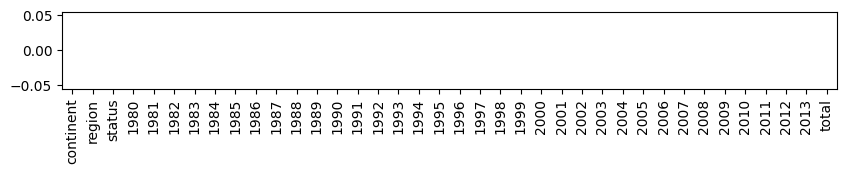

In [81]:
df.isnull().sum().plot(figsize=(10,1), kind='bar')

total immigration visualization

<Axes: title={'center': 'Total Immigration'}, xlabel='Country'>

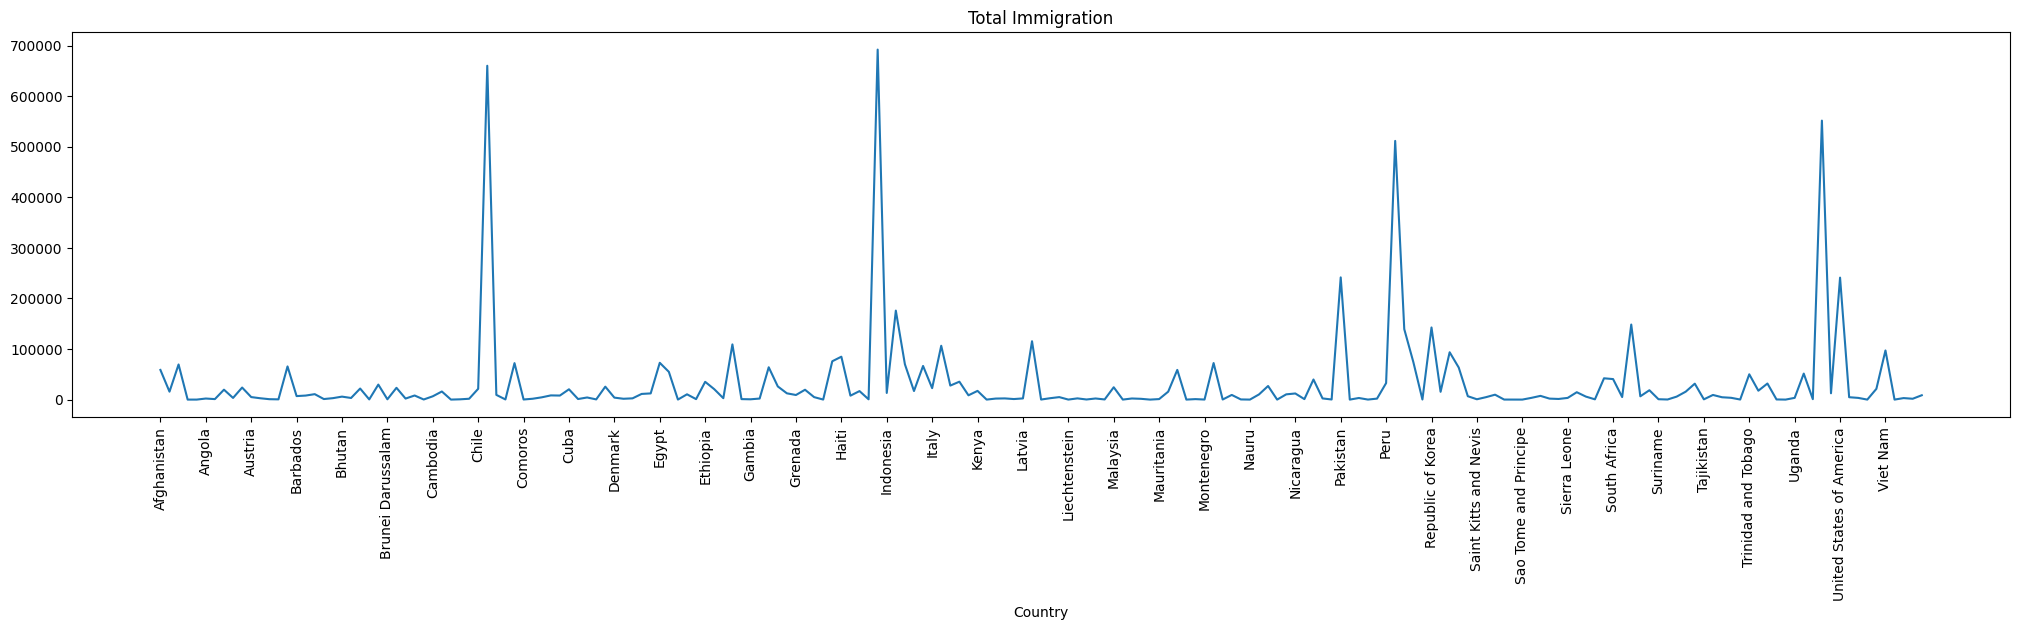

In [82]:
df.total.plot(rot=90, figsize=(25,5), xticks=range(0,df.shape[0], 5), title='Total Immigration') # line plot

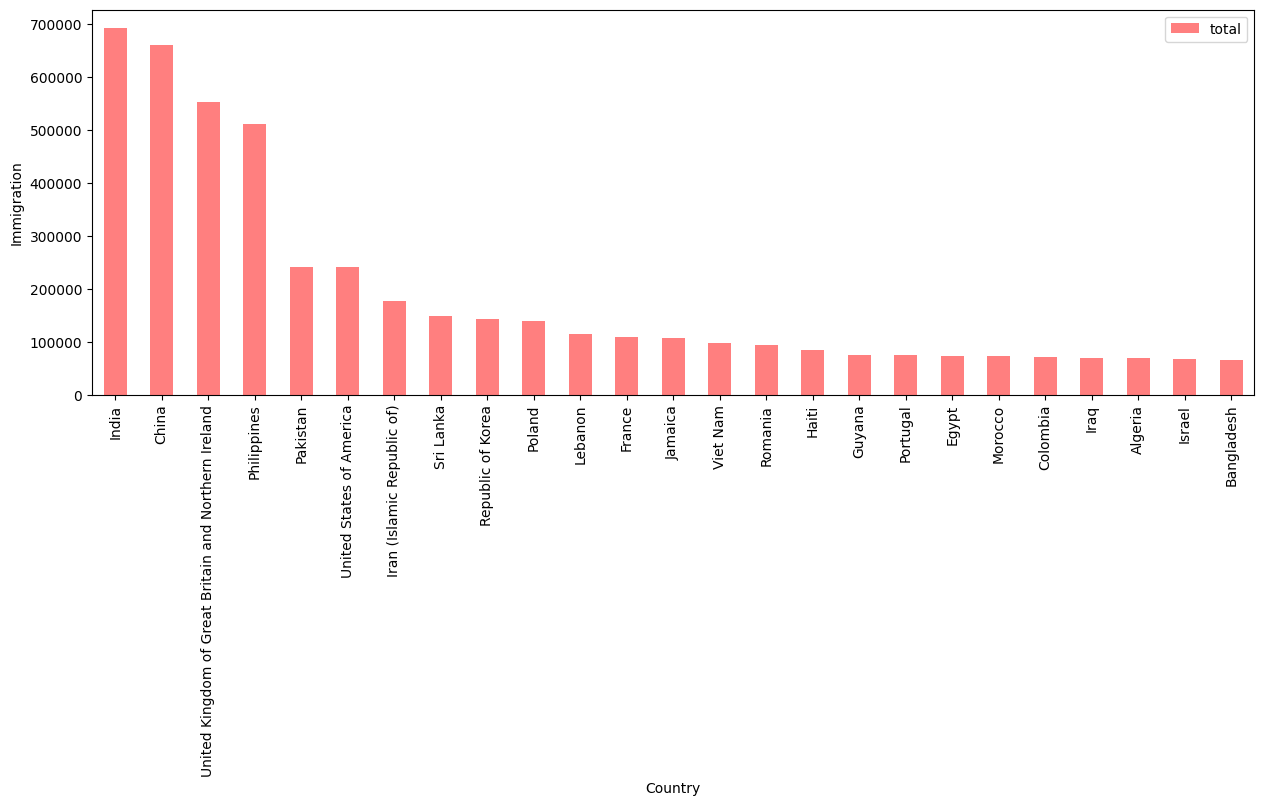

In [83]:
# top 25 countries with highest immigration
ax = df.sort_values('total',ascending=False).head(25).plot(kind='bar', y='total', figsize=(15,5),
    color='red', alpha=.5, xlabel='Country',ylabel='Immigration')